## BUSINESS UNDERSTANDING 

### Overview
People who enjoy chocolate often say, "If there is no chocolate in heaven, I'm not going." Chocolate is not only delicious; dark chocolate is also high in nutrients that can benefit your health. It's one of the best antioxidant sources available, made from the cacao tree's seed. According to research, dark chocolate can improve your health and lower your risk of heart disease. Dark chocolate's antioxidants have been shown to lower blood pressure, reduce the risk of clotting, and increase blood circulation to the heart, lowering the risks of stroke, coronary heart disease, and heart disease death.

### Problem Statement
Gourmet chocolate bars are something that Willy Wonka's Chocolate wants to add. In order to influence our initial approach to potential suppliers, we want to know best qualities of chocolate.

### Objectives
To find out if the cacao beans' country of origin affects the grade.

To find out if ratings vary depending on the percentage of cocoa in the bar.

To see if the number of ingredients affects the rating.

To find out if the type of ingredients affects the rating.

### Business Question
Which country are cocoa beans most commonly from?

Which ingredients are most widely used?

How many ingredients does the best-rated chocolate have?

### Expected Benefits to the Organization
We can reduce our supplier search with its assistance.

## Data Understanding

### Overview
I'll attempt to learn more from the provided information so that Willy Wonka's Chocolate can focus its supplier search.

### Data Description

* "id" - id number of the review
* "manufacturer" - Name of the bar manufacturer
* "company_location" - Location of the manufacturer
* "year_reviewed" - From 2006 to 2021
* "bean_origin" - Country of origin of the cacao beans
* "bar_name" - Name of the chocolate bar
* "cocoa_percent" - Cocoa content of the bar (%)
* "num_ingredients" - Number of ingredients
* "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
* "review" - Summary of most memorable characteristics of the chocolate bar
* "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

In [54]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import scipy.stats

# Import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [55]:
# Loading the data
df_chocs =pd.read_csv("Data\chocolate bars.csv")

In [56]:
# previewing the data set
df_chocs.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"""Kokoa Kamili, batch 1""",76.0,3.0,"""B,S,C""","""rich cocoa, fatty, bready""",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"""Zorzal, batch 1""",76.0,3.0,"""B,S,C""","""cocoa, vegetal, savory""",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"""Bejofo Estate, batch 1""",76.0,3.0,"""B,S,C""","""cocoa, blackberry, full body""",3.75
3,2542,5150,U.S.A.,2021,Fiji,"""Matasawalevu, batch 1""",68.0,3.0,"""B,S,C""","""chewy, off, rubbery""",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"""Sur del Lago, batch 1""",72.0,3.0,"""B,S,C""","""fatty, earthy, moss, nutty,chalky""",3.00


In [57]:
# Previewing the last five rows of the data
df_chocs.tail()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
1813,2302,Pangea,Spain,2019,Peru,Chilique,71.0,2.0,"""B,S""","""sandy, fruit, cocoa, sour""",3.5
1814,1363,Park 75,U.S.A.,2014,Blend,South America,65.0,3.0,"""B,S,V""","""mild nutty, basic cocoa""",3.5
1815,1251,Parliament,U.S.A.,2014,Bolivia,Alto Beni,70.0,2.0,"""B,S""","""gritty, woody, acidic""",3.0
1816,1255,Parliament,U.S.A.,2014,Dominican Republic,"""Oko Caribe, batch 4""",70.0,2.0,"""B,S""","""mild spice, grapes""",3.5
1817,1542,Parliament,U.S.A.,2015,Guatemala,"""Lachua, Q'egchi families""",70.0,2.0,"""B,S""","""intense, blackberry, acidic""",3.5


In [58]:
# getting the shape of the data
print(f" This data has {df_chocs.shape[0]} rows and {df_chocs.shape[1]} columns")

 This data has 1818 rows and 11 columns


### Preliminary Data Inspection

In [59]:
# Getting the 'data' about the data
df_chocs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1818 non-null   int64  
 1   manufacturer      1818 non-null   object 
 2   company_location  1818 non-null   object 
 3   year_reviewed     1818 non-null   int64  
 4   bean_origin       1818 non-null   object 
 5   bar_name          1818 non-null   object 
 6   cocoa_percent     1818 non-null   float64
 7   num_ingredients   1754 non-null   float64
 8   ingredients       1754 non-null   object 
 9   review            1818 non-null   object 
 10  rating            1818 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 156.4+ KB


In [60]:
# Obtaining the summary descriptive statistics of the data
df_chocs.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1818.0,1443.671617,758.434534,5.0,810.0,1462.00,2108.0,2712.0
year_reviewed,1818.0,2014.451595,3.960332,2006.0,2012.0,2015.00,2018.0,2021.0
cocoa_percent,1818.0,71.520627,5.615671,42.0,70.0,70.00,74.0,100.0
num_ingredients,1754.0,3.000570,0.899705,1.0,2.0,3.00,4.0,6.0
rating,1818.0,3.188119,0.447606,1.0,3.0,3.25,3.5,4.0


#### Observations
` year_reviewed` should be casted as a datetime object. 

`id`  should be casted to object.

In [61]:
# Getting the data types of the data
df_chocs.dtypes.value_counts()

object     6
float64    3
int64      2
dtype: int64

In our dataset, there are 6 string features and 5 numeric characteristics.

## Data Preparation

### Data Cleaning
* Checking for missing values
* Checking for duplicates
* converting incorrect datatypes to appropriate datatypes

#### Checking for and handling Missing values

In [62]:
# Checking for null values
df_chocs.isna().sum().sort_values(ascending = False)

num_ingredients     64
ingredients         64
id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
review               0
rating               0
dtype: int64

In [63]:
# checking the column's missing value percentage
percent_missing = df_chocs.isnull().sum() * 100 / len(df_chocs)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing.sort_values(ascending=False)})
missing_value_df

,percent_missing
num_ingredients,3.520352
ingredients,3.520352
id,0.000000
manufacturer,0.000000
company_location,0.000000
year_reviewed,0.000000
bean_origin,0.000000
bar_name,0.000000
cocoa_percent,0.000000
review,0.000000


`num_ingredients`	and `ingredients` columns have missing value.

#### Handling missing values for `ingredients` column

In [64]:
# checking the data type of ingredients column
df_chocs["ingredients"].dtypes

dtype('O')

In [65]:
# Imputing ingredients column using mode
df_chocs['ingredients'] = df_chocs['ingredients'].fillna(df_chocs['ingredients'].mode()[0])

In [66]:
# Checking if ingredients column has missing values
df_chocs["ingredients"].isna().sum()

0

The mode was used to successfully impute the `ingredients` column.

#### Handling missing values for `num_ingredients	` column

In [67]:
# checking the data type of num_ingredients column
df_chocs["num_ingredients"].dtypes

dtype('float64')

In [68]:
# Summary statistics of num_ingredients column
df_chocs['num_ingredients'].describe()

count    1754.000000
mean        3.000570
std         0.899705
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: num_ingredients, dtype: float64

In [69]:
# Imputing num_ingredients column using mean
df_chocs["num_ingredients"] = df_chocs["num_ingredients"]\
.fillna(df_chocs["num_ingredients"].mean())

In [70]:
# Checking if num_ingredients column has missing values
df_chocs["num_ingredients"].isna().sum()

0

The mean was used to successfully impute the `num_ingredients` column

#### Checking for duplicates

In [71]:
df_chocs.duplicated().sum()

0

There are no duplicate values in our dataset.

#### Type casting incorrect data types to correct data types

In [72]:
df_chocs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1818 non-null   int64  
 1   manufacturer      1818 non-null   object 
 2   company_location  1818 non-null   object 
 3   year_reviewed     1818 non-null   int64  
 4   bean_origin       1818 non-null   object 
 5   bar_name          1818 non-null   object 
 6   cocoa_percent     1818 non-null   float64
 7   num_ingredients   1818 non-null   float64
 8   ingredients       1818 non-null   object 
 9   review            1818 non-null   object 
 10  rating            1818 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 156.4+ KB


The columns `id` and `year_reviewed` need to be changed to the appropriate data types, object and datetime, respectively.

In [73]:
# Converting `id` column into a string
df_chocs["id"] = df_chocs["id"].values.astype(str)

In [74]:
# Checking if id is in string data type
df_chocs.id.dtypes

dtype('O')

The `id` column has been successfully transformed into an object.

In [75]:
# Converting year_reviewed column into datetime
df_chocs['year_reviewed'].astype('int32')
df_chocs['year_reviewed'] = pd.to_datetime(df_chocs['year_reviewed'],format='%Y')

In [76]:
# Checking if year_reviewed is in datetime data type
df_chocs['year_reviewed'].dtypes

dtype('<M8[ns]')

The `year_reviewed` column has been successfully transformed into an datetime.

## Exploratory Data Analysis

In this section, trends and patterns are examined using statistics and visualizations to demonstrate the relationships between the many variables in the data.

### Univariate Analysis

#### Feature `manufacturer`

In [77]:
# Value counts of manufacturer
df_chocs.manufacturer.value_counts()

Fresco                39
Arete                 32
Bonnat                30
A. Morin              26
Dandelion             25
                      ..
Charm School           1
Cote d' Or (Kraft)     1
Madhu                  1
Chloe Chocolat         1
Love Bar               1
Name: manufacturer, Length: 427, dtype: int64

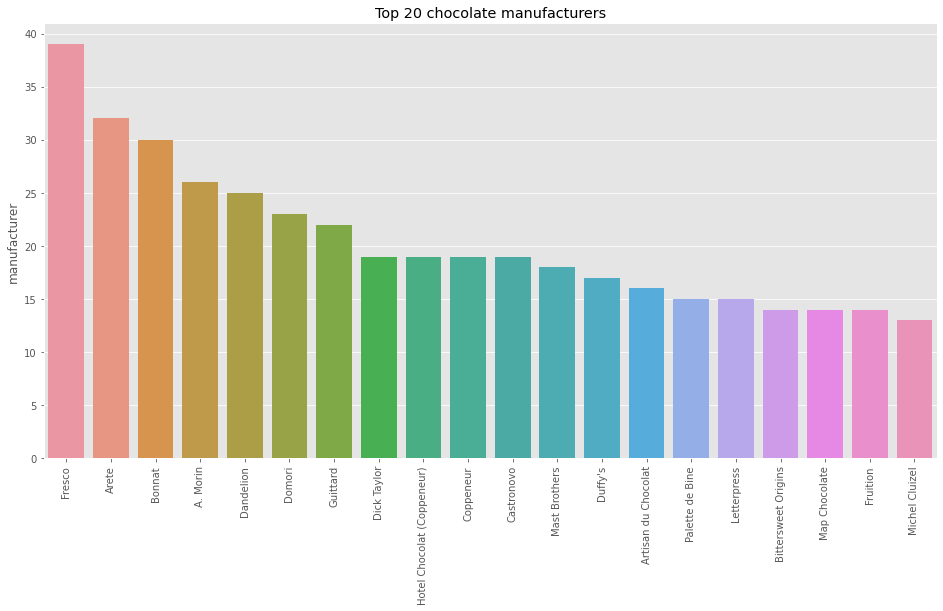

In [78]:
# Visualizing the top manufacturers
plt.figure(figsize=(16,8))
sns.barplot(data=df_chocs,x =df_chocs.manufacturer.value_counts().index[:20],
            y =df_chocs.manufacturer.value_counts()[:20]).set(title="Top 20 chocolate manufacturers")
plt.xticks(rotation=90);

###### Observation
The majority of the chocolates were made by "Fresco" manufacturers.

#### Feature `company_location`

In [79]:
# Value counts  of company location
df_chocs.company_location.value_counts()

U.S.A.                   813
France                   124
U.K.                     103
Canada                    85
Italy                     57
                        ... 
St.Vincent-Grenadines      1
India                      1
Martinique                 1
Ireland                    1
Ghana                      1
Name: company_location, Length: 65, dtype: int64

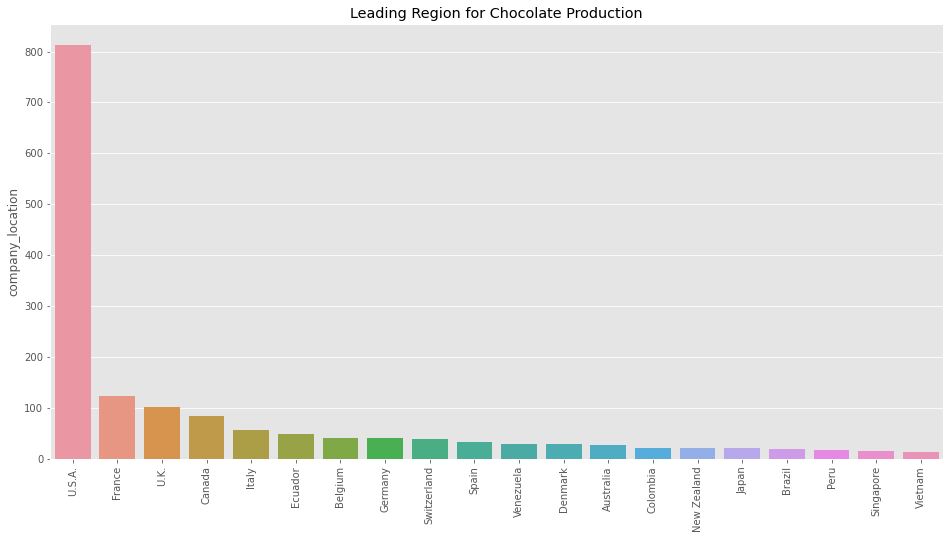

In [80]:
# Visualizing the top company_location producing lots of chocolate
plt.figure(figsize=(16,8))
sns.barplot(data=df_chocs,x =df_chocs.company_location.value_counts().index[:20],
            y =df_chocs.company_location.value_counts()[:20])\
.set(title="Leading Region for Chocolate Production")
plt.xticks(rotation=90);

###### Observation
According to the data, the `USA` is the country that produces the most chocolate.

#### Feature `bean_origin`

In [121]:
# Value counts  of bean_origin
bean_origin_value_count = df_chocs.bean_origin.value_counts()
bean_origin_value_count

Venezuela                195
Peru                     170
Dominican Republic       165
Ecuador                  158
Madagascar               110
Blend                    101
Nicaragua                 77
Colombia                  60
Brazil                    58
Belize                    58
Vietnam                   57
Tanzania                  55
Bolivia                   53
Guatemala                 47
Mexico                    43
Papua New Guinea          36
Costa Rica                32
U.S.A.                    29
India                     27
Ghana                     27
Trinidad                  25
Haiti                     17
Honduras                  17
Jamaica                   17
Philippines               17
Grenada                   14
Indonesia                 14
Uganda                    12
Sao Tome                  11
Fiji                      11
St. Lucia                 10
Vanuatu                   10
Malaysia                   8
Cuba                       8
Panama        

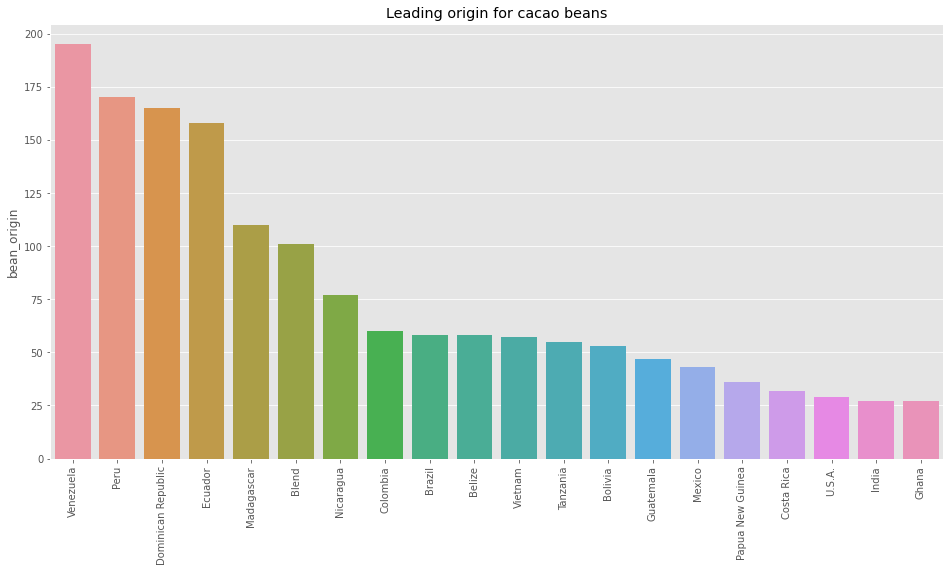

In [118]:
# Visualizing the top cacao beans origin producing lots of chocolate
plt.figure(figsize=(16,8))
sns.barplot(data=df_chocs,x =df_chocs.bean_origin.value_counts().index[:20],
            y =df_chocs.bean_origin.value_counts()[:20])\
.set(title="Leading origin for cacao beans")
plt.xticks(rotation=90);

###### Observation
According to the data, `Venezuela` cacao beans are most frequently used to make chocolate.


#### Feature `bar_name`

In [83]:
# Value counts  of chocolate bars
df_chocs.bar_name.value_counts()

Madagascar                             39
Ecuador                                34
Peru                                   27
Dominican Republic                     23
Chuao                                  23
                                       ..
"Gola Rainforest, 2017 harvest"         1
"WAMPU, La Mosquitia, 2017 harvest"     1
"Anamalai, 2017 harvest"                1
"Ben Tre, 2018 Harvest"                 1
"Lachua, Q'egchi families"              1
Name: bar_name, Length: 1193, dtype: int64

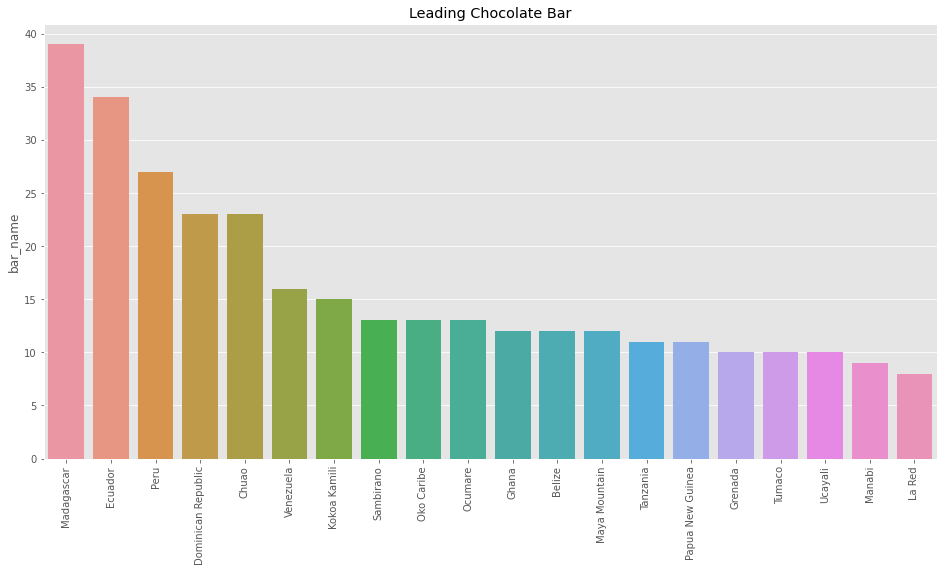

In [84]:
# Visualizing the top company_location producing lots of chocolate
plt.figure(figsize=(16,8))
sns.barplot(data=df_chocs,x =df_chocs.bar_name.value_counts().index[:20],
            y =df_chocs.bar_name.value_counts()[:20])\
.set(title="Leading Chocolate Bar")
plt.xticks(rotation=90);

###### Observation
Analysis shows that the `Madagascar` chocolate bar is the most bought.

#### Feature `cocoa_percent`

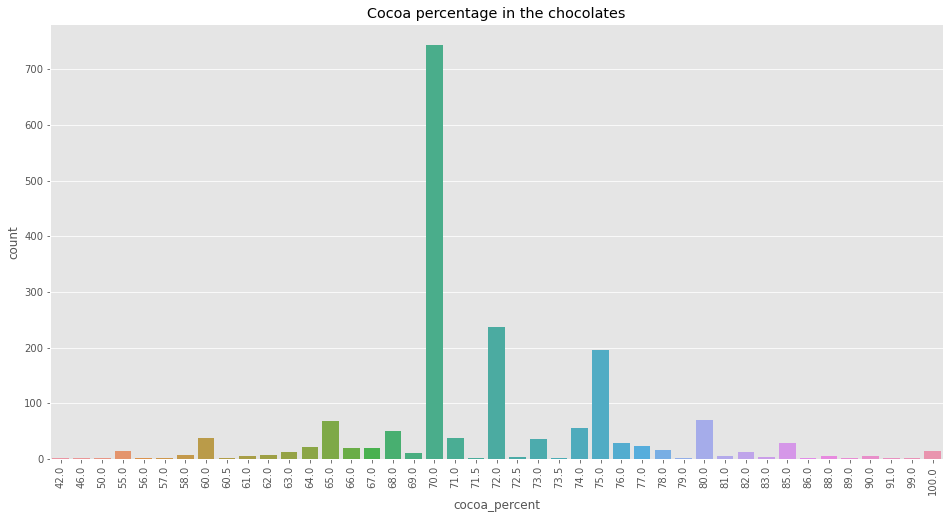

In [85]:
# A count plot that displays how the chocolate bars' average proportion of cocoa is distributed
plt.figure(figsize=(16,8))
sns.countplot(data = df_chocs,x=df_chocs["cocoa_percent"])\
.set(title="Cocoa percentage in the chocolates")
plt.xticks(rotation=90);

###### Observation
Most chocolate bars had a cacao proportion of  70%, per the analysis.

#### Feature `num_ingredients`

In [86]:
# num_ingredients value count
df_chocs['num_ingredients'].value_counts()

3.00000    709
2.00000    575
4.00000    352
5.00000    110
3.00057     64
6.00000      4
1.00000      4
Name: num_ingredients, dtype: int64

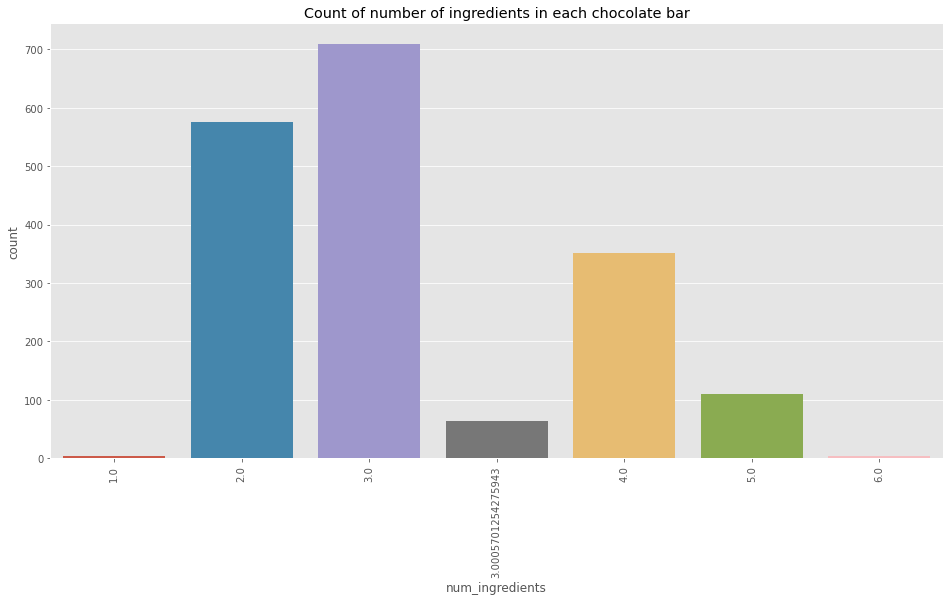

In [87]:
# Count plot for the number of ingredients used to make a chocolate bar
plt.figure(figsize=(16,8))
sns.countplot(data = df_chocs,x=df_chocs["num_ingredients"])\
.set(title="Count of number of ingredients in each chocolate bar")
plt.xticks(rotation=90);

###### Observation
The analysis revealed that the majority of the chocolates only contained three ingredients.

#### Feature `ingredients`

In [88]:
# Value counts for ingredients
df_chocs['ingredients'].value_counts()

"B,S,C"           760
"B,S"             551
"B,S,C,L"         231
"B,S,C,V"         108
"B,S,C,V,L"       104
"B,S*"             24
"B,S*,C"            6
"B,S,C,V,Sa"        6
B                   4
"B,S,V,L"           4
"B,S,C,V,L,Sa"      4
"B,S,L"             3
"B,S,V"             3
"B,S*,C,Sa"         3
"B,S*,V,L"          3
"B,S*,C,L"          2
"B,S*,Sa"           1
"B,S,C,Sa"          1
Name: ingredients, dtype: int64

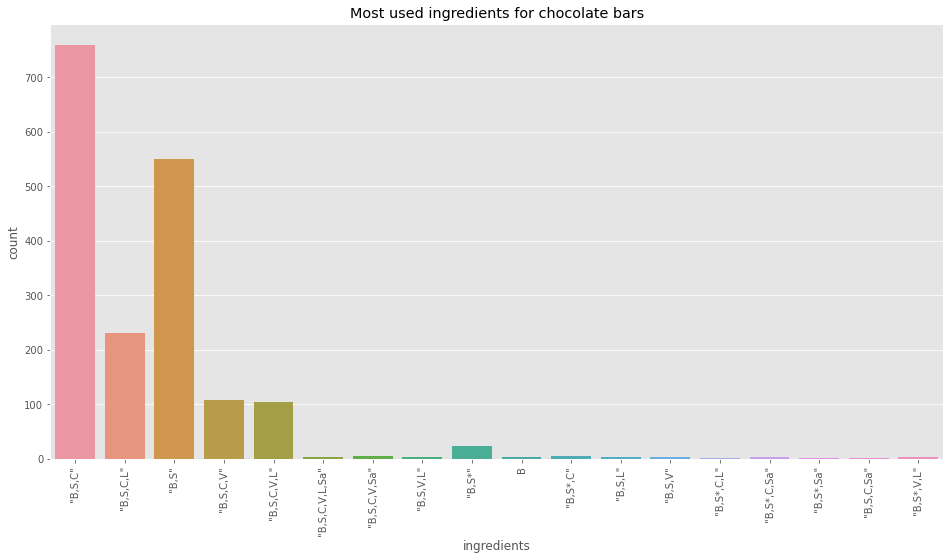

In [89]:
# Count plot for the ingredients used to make a chocolate bar
plt.figure(figsize=(16,8))
sns.countplot(data = df_chocs,x=df_chocs["ingredients"])\
.set(title="Most used ingredients for chocolate bars")
plt.xticks(rotation=90);

##### *Observation*
The majority of the chocolate bar, according to the research, contained beans, sugar, and cocoa butter.

####  Feature `rating`

In [90]:
# Value counts for ingredients
df_chocs['rating'].value_counts()

3.50    416
3.00    373
3.25    325
2.75    245
3.75    208
2.50    128
4.00     75
2.00     21
2.25     13
1.50      7
1.00      4
1.75      3
Name: rating, dtype: int64

##### Observations
The majority of the chocolate bars received ratings of 3.50, indicating that the reviewers thought the confections were pleasant and would suggest them to others.

### Bivariate Analysis

#### What is the relationship between `manufacturer` and `rating`

In [91]:
# Manufacturers that had the highest average rating to the lowest average rating
manufacturer_rating = (
    df_chocs
    .groupby("manufacturer")
    .rating.mean()
    .reset_index()
    .sort_values(by='rating',ascending=False)
)
manufacturer_rating

,manufacturer,rating
255,Heirloom Cacao Preservation (Zokoko),3.8750
403,Ocelot,3.8750
348,Matale,3.8125
264,Idilio (Felchlin),3.7750
393,Nikoa,3.7500
...,...,...
270,Jacque Torres,2.0000
98,Casa,2.0000
323,Machu Picchu Trading Co.,1.8750
91,Callebaut,1.8750


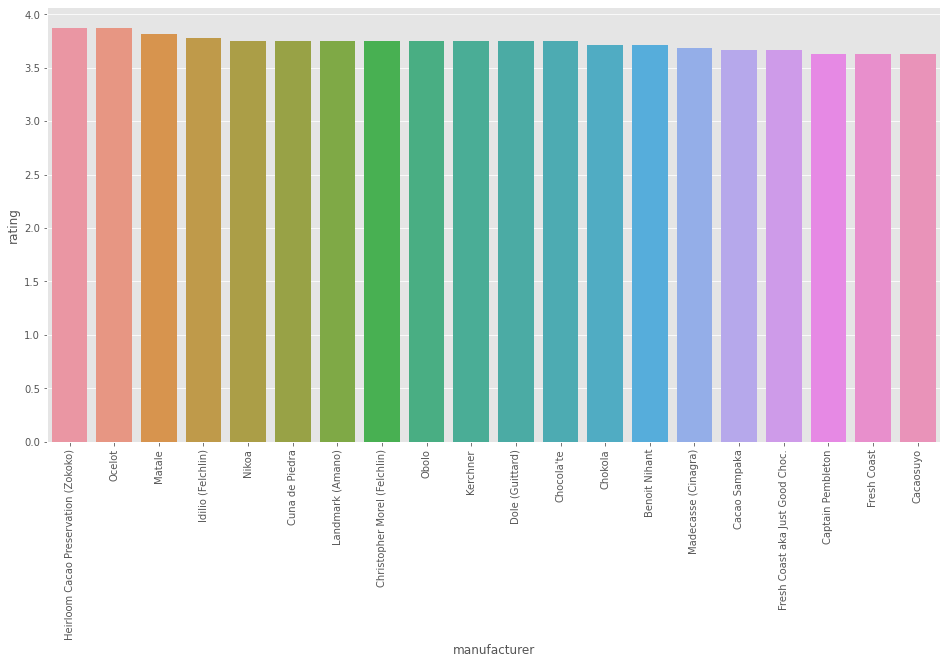

In [92]:
# Bar plot showing the top 20 manufactures whos chocolates were highly rated
plt.figure(figsize=(16,8))
sns.barplot(data = manufacturer_rating[:20],x = 'manufacturer', y = 'rating')
plt.xticks(rotation=90);

##### Observations
According to the analysis, 'Heirloom Cacao Preservation (Zokoko)' created chocolates with the best rating, indicating that consumers like their chocolates, whilst 'Cote d'Or (Kraft)' produced chocolates with the lowest rating, indicating that customers disliked their chocolates.

#### What is the relationship between `company_location` and `rating`

In [93]:
# location of the companies that had the highest average rating to the lowest average rating
company_location_rating = (
    df_chocs
    .groupby("company_location")
    .rating.mean()
    .reset_index()
    .sort_values(by='rating',ascending=False)
)
company_location_rating

,company_location,rating
8,Chile,3.750000
41,Poland,3.500000
63,Vietnam,3.428571
21,Guatemala,3.416667
58,U.A.E.,3.400000
...,...,...
61,Vanuatu,2.750000
19,Ghana,2.750000
64,Wales,2.750000
43,Puerto Rico,2.625000


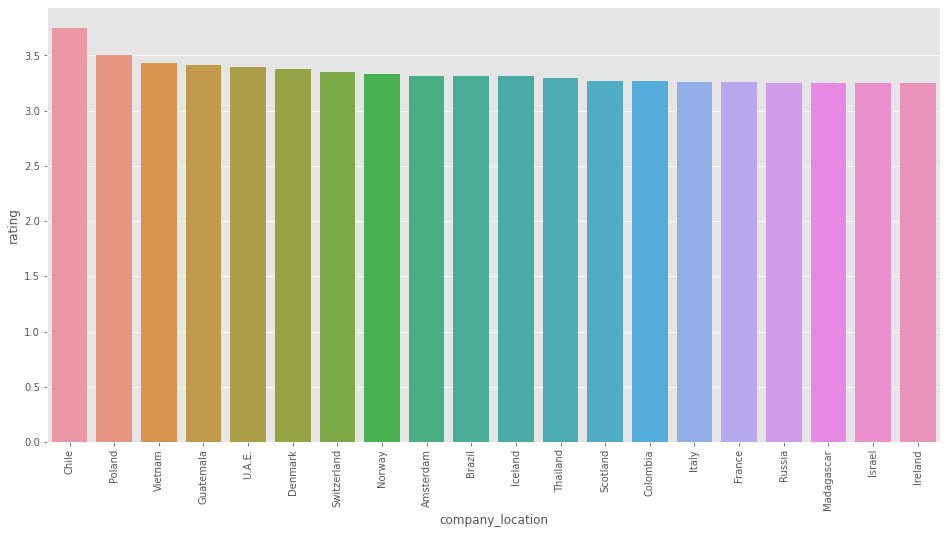

In [94]:
# Bar plot showing the top 20 manufactures whos chocolates were highly rated
plt.figure(figsize=(16,8))
sns.barplot(data = company_location_rating[:20],x = 'company_location', y = 'rating')
plt.xticks(rotation=90);

##### Observations
The data reveals that the Chilean companies got the highest average ratings, indicating that they made the greatest chocolate bars.

#### What is the relationship between `bean_origin` and `rating`

In [107]:
beans_origin_rating = (
    df_chocs
    .groupby("bean_origin")
    .rating.mean()
    .reset_index()
    .sort_values(by='rating',ascending=False)
)
beans_origin_rating

,bean_origin,rating
8,Congo,3.500000
39,Sao Tome & Principe,3.500000
41,Solomon Islands,3.500000
19,Haiti,3.441176
20,Honduras,3.352941
18,Guatemala,3.303191
48,Thailand,3.300000
52,U.S.A.,3.284483
56,Vietnam,3.280702
4,Brazil,3.275862


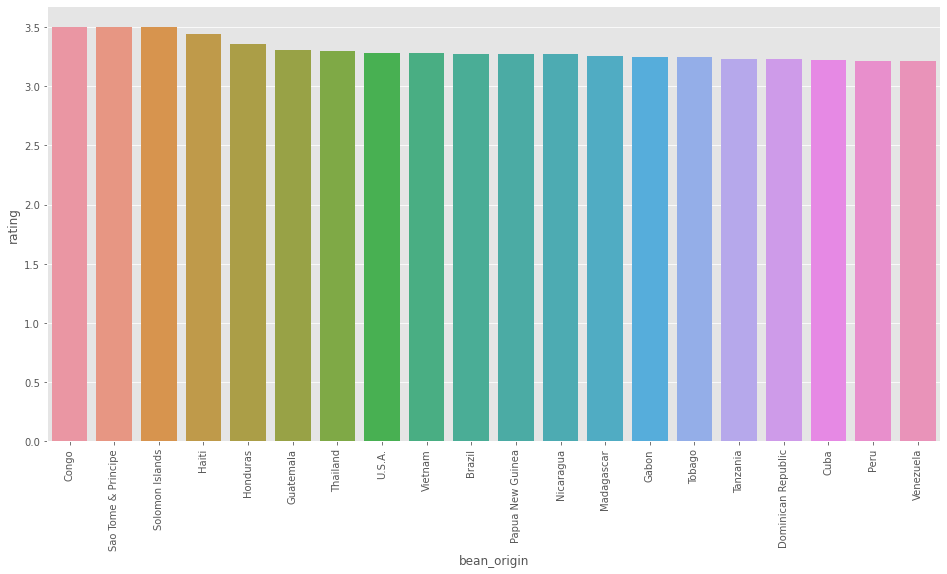

In [109]:
# Bar plot showing the top 20 bean_origin whos chocolates were highly rated
plt.figure(figsize=(16,8))
sns.barplot(data = beans_origin_rating[:20],x = 'bean_origin', y = 'rating')
plt.xticks(rotation=90);

##### Observation
The analysis shows that the bean origin of the most rated chocolates was from `Congo`.

#### What is the relationship between `cocoa_percent` and `rating`

In [129]:
cocoa_percent_rating = (
    df_chocs
    .groupby("cocoa_percent")
    .rating.mean()
    .reset_index()
    .sort_values(by='rating',ascending=False)
)
cocoa_percent_rating

,cocoa_percent,rating
2,50.0,3.750000
11,63.0,3.479167
17,69.0,3.400000
15,67.0,3.375000
14,66.0,3.362500
16,68.0,3.348039
29,78.0,3.296875
18,70.0,3.262433
30,79.0,3.250000
4,56.0,3.250000


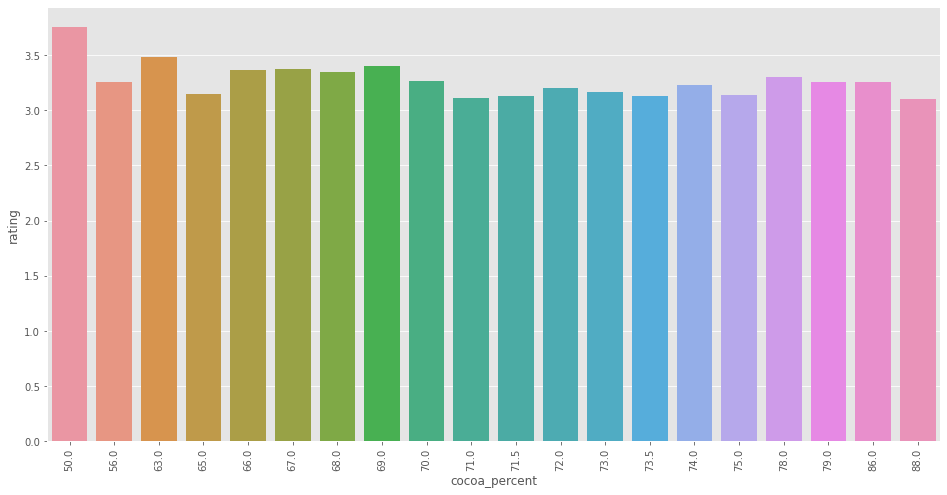

In [133]:
# Bar plot showing the top 20 cocoa percentage whos chocolates were highly rated
plt.figure(figsize=(16,8))
sns.barplot(data = cocoa_percent_rating[:20],x = 'cocoa_percent', y = 'rating')
plt.xticks(rotation=90);

##### Observations
The highest rated chocolates are made up of 50% cocoa.

#### What is the relationship between `num_ingredients` and `rating`

In [136]:
num_ingredients_rating= (
    df_chocs
    .groupby('num_ingredients')
    .rating.mean()
    .reset_index()
    .sort_values(by ='rating',ascending=False)
)

num_ingredients_rating

,num_ingredients,rating
2,3.00000,3.259168
1,2.00000,3.213478
4,4.00000,3.129972
5,5.00000,3.045455
0,1.00000,2.937500
6,6.00000,2.937500
3,3.00057,2.769531


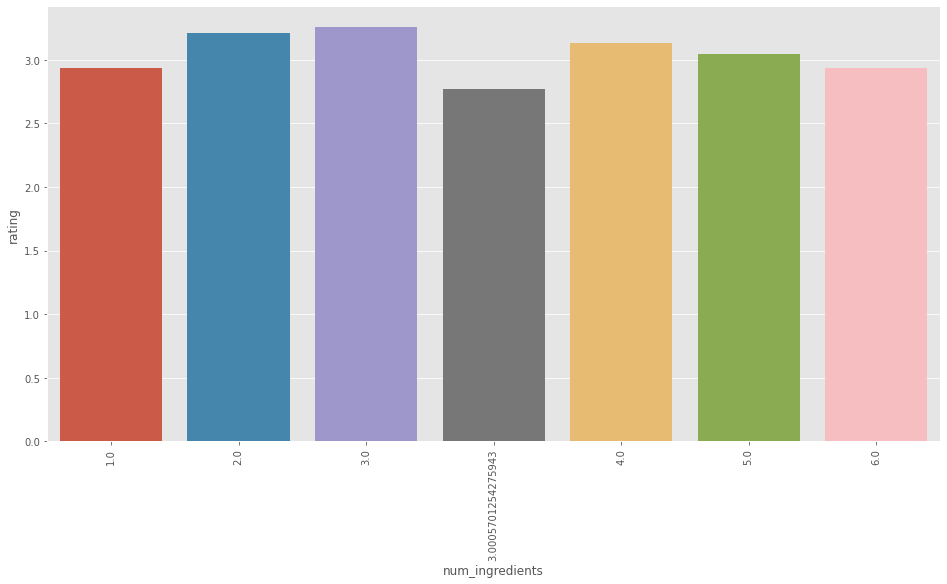

In [141]:
plt.figure(figsize=(16,8))
sns.barplot(data=num_ingredients_rating,x='num_ingredients',y='rating')
plt.xticks(rotation=90)
plt.show()

##### Observation
The highest rated chocolates are made of three ingredients.

#### What is the relationship between `ingredients` and `rating`

In [143]:
ingredients_rating =(
    df_chocs
    .groupby('ingredients')
    .rating.mean()
    .reset_index()
    .sort_values(by ='rating',ascending=False)
)

ingredients_rating

,ingredients,rating
9,"""B,S,C,Sa""",3.250000
0,"""B,S""",3.226407
7,"""B,S,C""",3.225658
8,"""B,S,C,L""",3.202381
15,"""B,S,V""",3.166667
6,"""B,S*,V,L""",3.083333
11,"""B,S,C,V,L""",3.060096
10,"""B,S,C,V""",3.016204
16,"""B,S,V,L""",3.000000
12,"""B,S,C,V,L,Sa""",2.937500


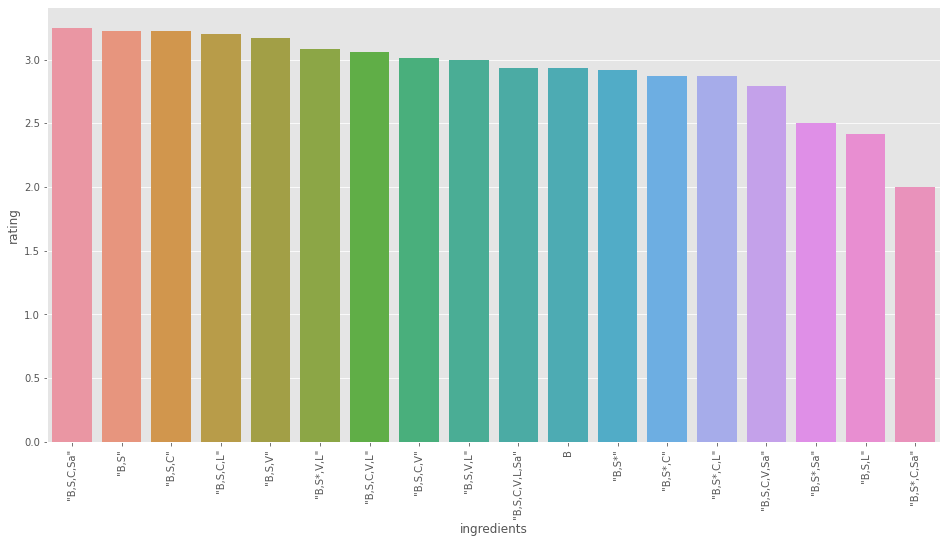

In [144]:
plt.figure(figsize=(16,8))
sns.barplot(data=ingredients_rating,x='ingredients',y='rating')
plt.xticks(rotation=90)
plt.show()

##### Observations
Chocolates that were made of  Beans, Sugar, Cocoa Butter, and Salt had the highest rating

## Conclusion

* Three ingredients are often included in chocolate bars.
* Chocolates of the best quality were prepared with beans from the Congo.
* The best chocolates had 50% cocoa by weight.
* Beans, sugar, cocoa butter, and salt were used to make high-quality chocolates.
* The USA produces the most chocolate.
* Venezuela cacao beans are most frequently used to make chocolate.